<a href="https://colab.research.google.com/github/HVM129/Wk1_-HomeWork/blob/master/Hw03_02_Admission_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
upload = files.upload()

Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1.csv


In [0]:
ls

Admission_Predict.csv  Admission_Predict_Ver1.1.csv  sample_data/


In [0]:
pwd

'/content'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("../content"))


['.config', 'Admission_Predict_Ver1.1.csv', 'Admission_Predict.csv', 'sample_data']


In [0]:
data_predict=pd.read_csv('../content/Admission_Predict_Ver1.1.csv')

In [0]:
print('Data First 5 Rows\n')
data_predict.head()

Data First 5 Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
print('Data Last 5 Rows\n')
data_predict.tail()

Data Last 5 Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [0]:
print('Data Random Rows\n')
data_predict.sample(5)

Data Random Rows



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,91,318,106,2,4.0,4.0,7.92,1,0.64
123,124,308,108,3,3.5,3.5,8.22,0,0.61
74,75,314,106,3,3.0,5.0,8.90,0,0.74
219,220,312,104,3,3.5,3.5,8.42,0,0.74
92,93,298,98,2,4.0,3.0,8.03,0,0.34


In [0]:
print("Random rows in dataset\n")
data_predict.sample(frac=.1)

Random rows in dataset



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
72,73,321,111,5,5.0,5.0,9.45,1,0.93
435,436,309,105,2,2.5,4.0,7.68,0,0.55
450,451,320,112,4,3.0,4.5,8.86,1,0.82
283,284,321,111,3,2.5,3.0,8.90,1,0.80
285,286,331,116,5,4.0,4.0,9.26,1,0.93
345,346,316,98,1,1.5,2.0,7.43,0,0.49
239,240,299,100,1,1.5,2.0,7.89,0,0.59
438,439,318,110,1,2.5,3.5,8.54,1,0.67
86,87,315,106,3,4.5,3.5,8.42,0,0.72
17,18,319,106,3,4.0,3.0,8.00,1,0.65


In [0]:
print('Data Show Describe\n')
data_predict.describe()

Data Show Describe



,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [0]:
print('Data Show Info\n')
data_predict.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [0]:
print('Data Show Columns')
data_predict.columns

Data Show Columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [0]:
data_predict.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [0]:
print('Data Show Shape')
data_predict.shape

Data Show Shape


(500, 9)

In [0]:
data_predict.isnull().values.any()

False

In [0]:
print('Data Show Is NULL')
data_predict.isnull().sum()

Data Show Is NULL


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [0]:
for col in data_predict.columns:
    print(data_predict[data_predict[col].isnull()])

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []
Empty DataFrame
Columns: [Serial No., GRE Score,

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

dataset=pd.read_csv("../content/Admission_Predict_Ver1.1.csv")
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
updated_dataset=dataset.iloc[:,1:9]
updated_dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
print(updated_dataset.shape)
updated_dataset.describe()

(500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [0]:
updated_dataset.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [0]:
updated_dataset.corr(method="pearson")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


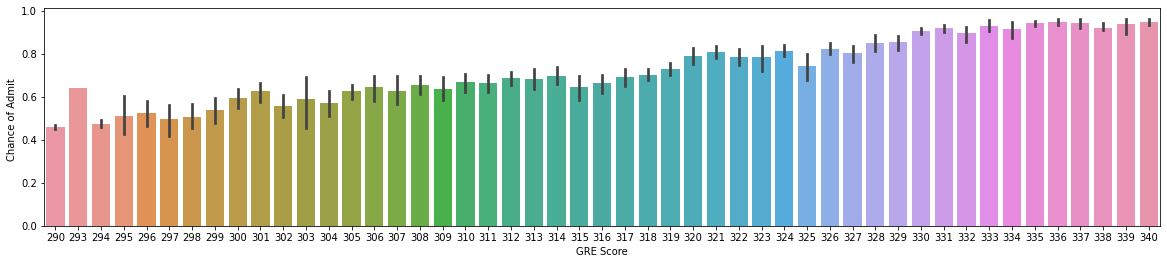

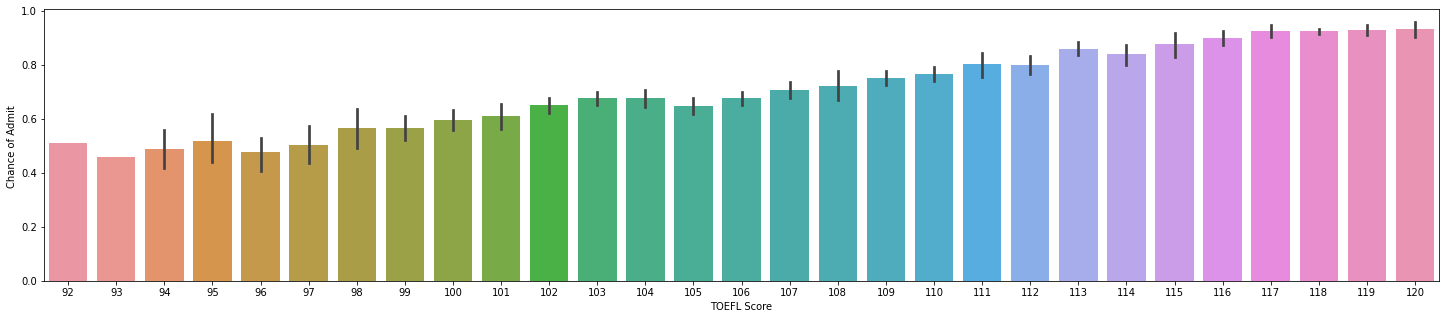

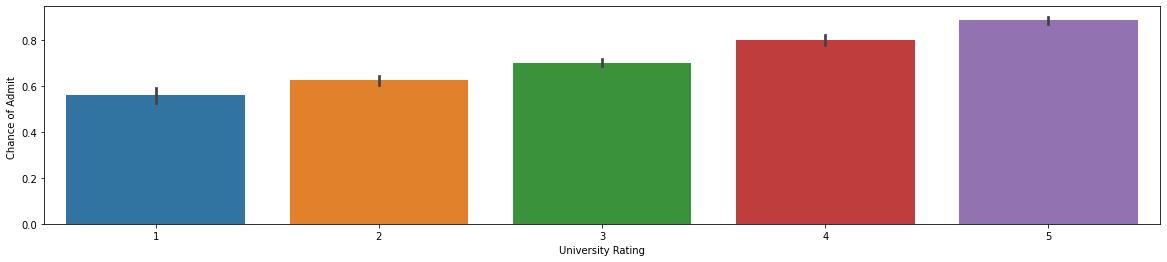

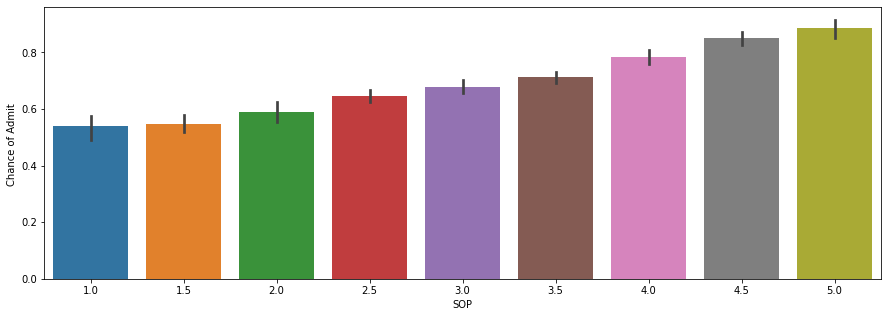

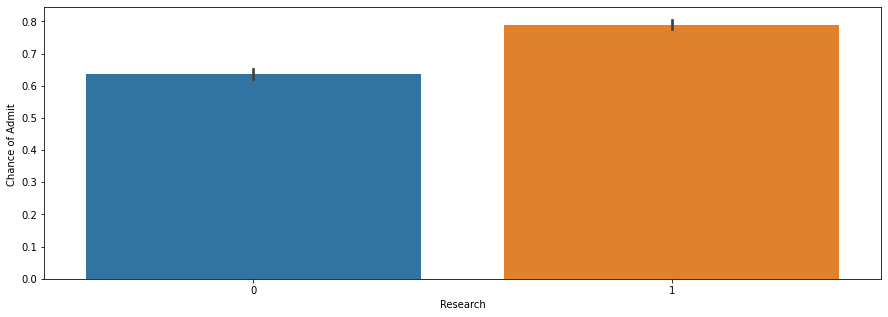

In [0]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=dataset)
#plt.subplots(figsize=(15,4))
#sns.barplot(x="CGPA",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=dataset)

In [0]:
X=updated_dataset.iloc[:,:7]
y=updated_dataset["Chance of Admit "]

In [0]:
print(X.shape)
print(y.shape)
X.head()

(500, 7)
(500,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [0]:
from sklearn.linear_model import LinearRegression
#Linear Regression
Linear=LinearRegression()
Linear.fit(X_train,y_train)
y_pred=Linear.predict(X_test)
y_pred

array([0.62858489, 0.5630453 , 0.62610849, 0.52278247, 0.50451666,
       0.76156908, 0.90718643, 0.6458427 , 0.5415052 , 0.55657926,
       0.96425939, 0.93686676, 0.78819729, 0.74752677, 0.77994022,
       0.65097779, 0.77492475, 0.89655977, 0.66998219, 0.7928963 ,
       0.67387898, 0.65227253, 0.68469348, 0.60918057, 0.65299459,
       0.7319318 , 0.7324281 , 0.84755228, 0.68454267, 0.61497989,
       0.99610597, 0.68451526, 0.86773922, 0.8851996 , 0.55217387,
       0.72482522, 0.9660184 , 0.73846807, 0.96128332, 0.47471084,
       0.95160397, 0.83413252, 0.69629798, 0.72724642, 0.80494755,
       0.66388272, 0.74984219, 0.8369197 , 0.52067787, 0.83186697,
       0.83943883, 0.81875093, 0.58809134, 0.66652365, 0.56024635,
       0.79175916, 0.75478871, 0.97239619, 0.43578097, 0.58490642,
       0.62547018, 0.96412368, 0.82489705, 0.88263358, 0.63923411,
       0.64090726, 0.7174835 , 0.71048489, 0.56912616, 0.93739847,
       0.9005515 , 0.72556868, 0.88482532, 0.7595775 , 0.66992

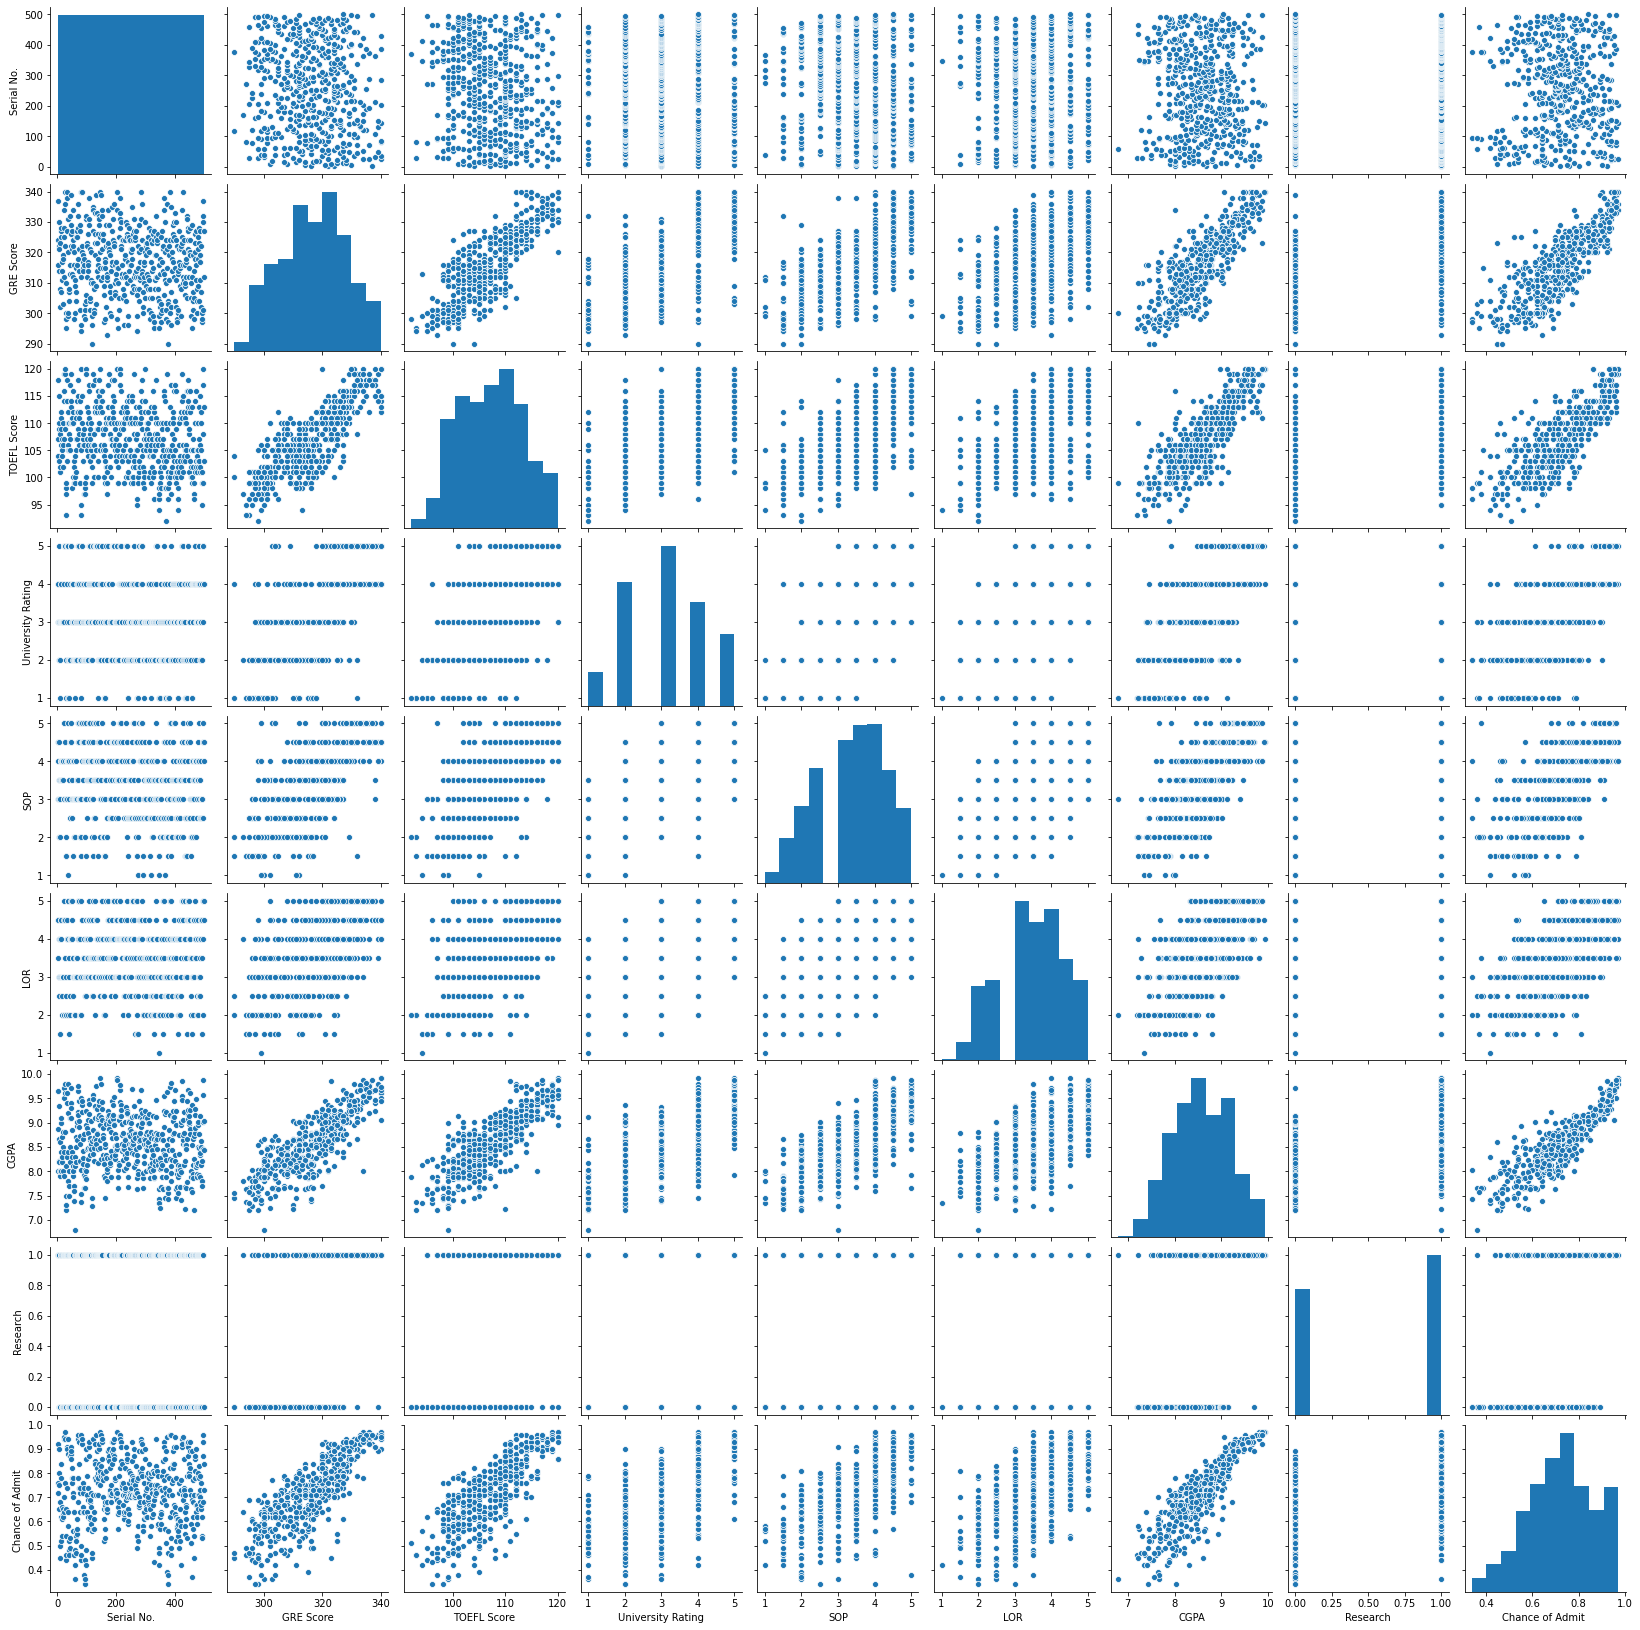

In [0]:
sns.pairplot(data_predict)
plt.show()

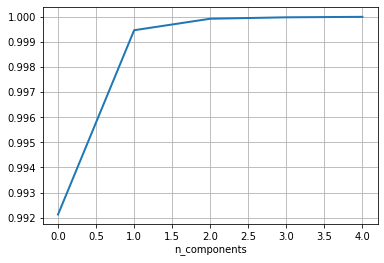

In [0]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=5
pca_data=pca.fit_transform(data_predict)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.show()


In [0]:
data=pd.read_csv('../content/Admission_Predict_Ver1.1.csv')
data.drop('Serial No.',axis=1,inplace=True)
data=data.rename(columns={'Chance of Admit ':'Chance of Admit','LOR ':'LOR'})
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
data['Chance of Admit']=[1 if i>=0.8 else 0 for i in data['Chance of Admit']]
data['Chance of Admit'].head()

0    1
1    0
2    0
3    1
4    0
Name: Chance of Admit, dtype: int64

In [0]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
X=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research']]
y=data['Chance of Admit']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
X_train

array([[ 0.41136398,  0.62626453,  1.65026859, ...,  1.64050532,
         1.46352883,  0.91473203],
       [-1.58300593, -1.17921562, -0.95541866, ...,  0.01802753,
        -1.14721001, -1.09321633],
       [-1.22039322, -0.35854282,  1.65026859, ...,  1.09967939,
         0.13321604, -1.09321633],
       ...,
       [-1.3110464 , -1.34335018, -1.82398107, ..., -1.60445026,
        -2.19483133, -1.09321633],
       [-0.67647416, -0.35854282, -0.95541866, ...,  0.55885346,
        -1.47978821, -1.09321633],
       [-0.22320827, -0.19440827, -0.95541866, ...,  0.01802753,
        -0.53194035, -1.09321633]])

In [0]:
X_test

array([[ 1.58985529,  1.44693732,  0.78170617,  0.63588801,  0.01802753,
         1.61318902,  0.91473203],
       [-0.22320827,  0.13386085,  0.78170617,  1.13967252,  0.55885346,
         0.78174353,  0.91473203],
       [-0.13255509, -0.35854282, -0.95541866, -1.37925005, -1.06362433,
        -1.52967494, -1.09321633],
       [-0.40451462,  0.29799541, -0.08685624, -0.37168102, -0.5227984 ,
         0.19973168, -1.09321633],
       [ 0.86462986,  0.79039909, -0.08685624,  0.13210349, -0.5227984 ,
         0.79837244,  0.91473203],
       [ 1.1365894 ,  0.62626453,  0.78170617,  1.13967252,  0.55885346,
         1.09769282,  0.91473203],
       [-2.39888453, -1.17921562, -1.82398107, -1.88303456, -1.60445026,
        -1.67933513, -1.09321633],
       [-1.40169958, -0.19440827,  0.78170617, -0.87546553, -0.5227984 ,
        -0.16610433, -1.09321633],
       [ 0.13940444,  0.29799541, -0.08685624,  0.13210349,  0.55885346,
         1.08106391,  0.91473203],
       [ 0.3207108 ,  0.7903

In [0]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions=knn.predict(X_test)
    error_rate.append(np.mean(predictions!=y_test))

num=np.array(error_rate).argmin()+1

print ('The lowest error rate is ',np.min(error_rate),'when k=',num)

The lowest error rate is  0.02 when k= 13


In [0]:
df = pd.read_csv('../content/Admission_Predict.csv')

In [0]:
from numpy.random import randint
params = {"max_depth":[1,5],
         "max_features":randint(1,7,size=4), # Use maximum 4 features 
         "min_samples_leaf":randint(1,4,size=3)}

In [0]:
df.describe()
df_features = df.drop(['Chance of Admit ','Serial No.'],axis=1)
df_target = df['Chance of Admit ']

In [0]:

from sklearn.tree import DecisionTreeRegressor


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_features,df_target,test_size=0.2,random_state=123)

In [0]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(320, 7) (80, 7) (320,) (80,)


In [0]:
dt = DecisionTreeRegressor(criterion='mse',max_depth=2,splitter='best',min_samples_split=2)
dt_fit = dt.fit(X_train,Y_train)

In [0]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = dt_fit.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(rmse,r2_score(Y_test,y_pred))

0.09146122240498428 0.5666252481731137


In [0]:
from numpy.random import randint
params = {"max_depth":[1,5],
         "max_features":randint(1,7,size=4), # Use maximum 4 features 
         "min_samples_leaf":randint(1,4,size=3)}

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = dt,param_distributions = params,n_iter=15,cv=5)

In [0]:
random_search.fit(df_features, df_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse', max_depth=2,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                  

In [0]:
print(random_search.best_estimator_)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [0]:
print(random_search.best_params_)

{'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 5}


In [0]:
print(random_search.best_score_)

0.6732136033314067


In [0]:
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
df.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ':'LOR'}, inplace=True)
df.drop(labels='Serial No.', axis=1, inplace=True)

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

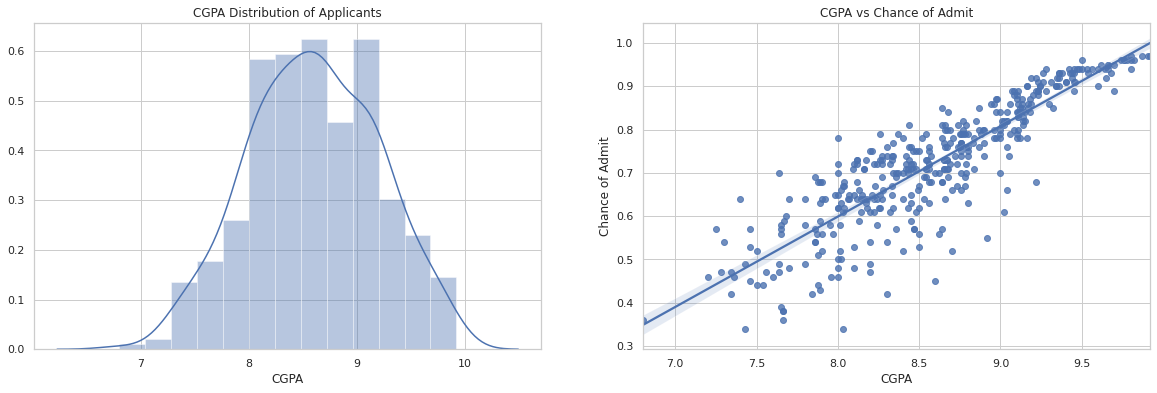

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance of Admit'])
plt.title('CGPA vs Chance of Admit')

In [0]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
mean_chance = df['Chance of Admit'].mean()

In [0]:
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)

In [0]:
forest = RandomForestClassifier(n_estimators=110,max_depth=6,random_state=0)
forest.fit(X_train, y_train_binary)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test_binary))*100
forest_score

96.25